# Module 1, Notebook 1: Wrangling ADNI PET Imaging and Outcome Data  

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/julclu/CSC509/blob/main/Module1/Module1_NB1_ADNI_PET_DataWrangling.ipynb)



# 0. Introduction

* The hardest part of data science is understanding and preprocessing your dataset to use for proper inference.  
* In this notebook, the goal is to understand the very messy dataset downloaded directly from ADNI's website. 
* It was downloaded in Zip files and unzipped using a previous notebook; you can look at that if you wish. 
* From there, we need to organize the data and understand whether there are: 
    * Any duplicates
    * Which slice/slices and which patients we're going to use for classification 
    * What we are trying to predict 
    * If there are any additional factors to consider
    
The notebook is organized as follows: 
1. Mounting and accessing the data 
2. Understanding the clinical data & how it relates to the imaging data in the folder
3. Investigating the imaging data
4. Creating your dataset (paired imaging + clinical data) 

# Instructions

Please make a copy and rename it with your name (ex: Module1_NB1_Ilmi_Yoon). All grading will be from the questions posted on iLearn. This is for your own reference and exercise and for taking screenshots of the report you will be making for your homework. 

You will be submitting **a pdf** file containing **the url of your own Module1_NB1.**


# 1. Mounting and Accessing the Data

The packages that we will be using include system packages: 
* os 
* glob 
* tqdm 
* pathlib 
* google.colab 

The data science packages that we will be using are: 
* numpy 
* collections
* math
* matplotlib.pyplot 

Please refer to the package API for further information on any of these packages. 

In [2]:
import numpy as np
import os
from pathlib import Path
import glob
import pandas as pd
from collections import Counter
import math
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive

ModuleNotFoundError: No module named 'google'

Because we are working on data stored in Google Drive, the following steps will need to be taken: 
1. Mount Google drive through using drive.mount('/content/drive')
2. Ceate a shortcut your personal Google Drive home directory to the location where the data is through: 
  * Navigating to https://drive.google.com/
  * Click "My Drive" 
  * Click the "+ New" button, add folder, and name it Data_Shortcut. This will be the place you can access to the data.
  * From drive.google.com, navigate to "Shared with me", click on rev3, CS509_Data
  * Right click on Module1_ADNI and click "Add shortcut to drive" 
  * Add to the Data_Shortcut you just created in MyDrive

In [1]:
drive.mount('/content/drive')

NameError: name 'drive' is not defined

In [4]:
DATA_PATH = Path('/content/drive/MyDrive/Data_Shortcut/Module1_ADNI/')

# 2. Understanding the clinical data & how it relates to the imaging data in the folder

We want to make sure we've mounted the data properly and that there are a good number of patients in the PET data folder: 

In [5]:
num_pts = len(os.listdir(Path(DATA_PATH,'PET')))
print(f'There are {num_pts} patients in the folder')

There are 1111 patients in the folder


Here, we want to see if we can get the cognitive group or specific outcomes for the patients that are in the folder. In order to do that, we downloaded a CSV file associated with the PET data from the ADNI website. List the files in the CSV directory below and read them in, inspect the columns and rows of the CSV file: 

In [6]:
os.listdir(Path(DATA_PATH, 'CSVS',))

['ADNI_PET_MiddleSlices_UniformResolution_Averages.csv',
 'ADNI_2_AV45_base_10_01_2021.csv',
 'ADNI2_3_base_screen_AV45_10_08_2021.csv',
 'adnim.csv',
 'ADNI_Amyloid_Status_AV45_KAIST.csv',
 'ADNI_Amyloid_Status_UPenn_UCBerkeley.csv',
 'FDG_PET_CN_AD_12_07_2021.csv',
 'ADNI_FDGPET_FILEPATH_TO_DICOM_FOLDER.csv',
 'ADNI_FDGPET_FILEPATH_TO_DICOM_FOLDER_ClinicalData.csv',
 'ADNI_PET_MiddleSlices_ClinicalData.csv']

In [7]:
clinical_data_df = pd.read_csv(Path(DATA_PATH,'CSVS/ADNI_ClinicalData.csv'))

In [8]:
clinical_data_df.shape

(4761, 12)

In [9]:
clinical_data_df.head()

Image Data ID     Subject Group Sex  ...       Type   Acq Date Format Downloaded
0       I877234  941_S_5193   SMC   F  ...  Processed  7/14/2017    DCM  8/31/2021
1       I378348  941_S_5193   SMC   F  ...  Processed  6/12/2013    DCM  9/16/2021
2       I877232  941_S_5193   SMC   F  ...  Processed  7/14/2017    DCM  9/01/2021
3       I378351  941_S_5193   SMC   F  ...  Processed  6/12/2013    DCM  9/16/2021
4       I877235  941_S_5193   SMC   F  ...  Processed  7/14/2017    DCM  9/01/2021

[5 rows x 12 columns]

In [ ]:
missing_clinical_data_df = pd.read_csv(Path(DATA_PATH,'CSVS/ADNI_MissingClinicalData.csv'))

In [1]:
clinical_data_df = clinical_data_df.append(missing_clinical_data_df)

NameError: name 'clinical_data_df' is not defined

Below, I want to see if the patients in the PET folder are in in the CSV file that we downloaded: 

In [2]:
pt_in_csv = []
pt_in_clinical_data_df = clinical_data_df.Subject.tolist()

for patient_id in os.listdir(DATA_PATH/'PET'): 
    if patient_id in pt_in_clinical_data_df:
        pt_in_csv.append("yes")
    else: 
        pt_in_csv.append('no')
Counter(pt_in_csv)

NameError: name 'clinical_data_df' is not defined

In [11]:
print('There are ' + str(len(glob.glob(str(Path(DATA_PATH, 'PET', '*', '*')))))+ ' files in the in the patient folders')

There are 3095 files in the in the patient folders


So there are multiple PET images files in each folder. Let's see what kinds of PET there are. 

# 3. Investigating the imaging data

## 3.1 Understanding what imaging data is available, in what format, and how to access it 

In [12]:
Counter([x.split('/')[-1] for x in glob.glob(str(Path(DATA_PATH, 'PET', '*', '*')))]).most_common(10)

[('AV45_Coreg,_Avg,_Std_Img_and_Vox_Siz,_Uniform_Resolution', 645),
 ('AV45_Co-registered,_Averaged', 639),
 ('AV45_Coreg,_Avg,_Standardized_Image_and_Voxel_Size', 634),
 ('AV45_Co-registered_Dynamic', 633),
 ('AV45-Early_Coreg,_Dyn,_Std_Img_and_Vox_Siz,_Uniform_Resolution', 35),
 ('AV45-Early_Coreg,_Avg,_Standardized_Image_and_Voxel_Size', 33),
 ('AV45-Early_Coreg,_Avg,_Std_Img_and_Vox_Siz,_Uniform_Resolution', 32),
 ('AV45-Early_Coreg,_Dyn,_Standardized_Image_and_Voxel_Size', 30),
 ('ADNI_Brain_PET__Raw_FBB', 30),
 ('ADNI3-BRAIN_FBB', 20),
 ('PET_AC_FBB', 18),
 ('ADNI_Brain_PET__Raw_AV45', 16),
 ('ADNI_AV45_Brain_20min_dyn', 12),
 ('Dyn_Brain_VPHD_6i16s_AC_FBB', 12),
 ('90-110_min_dynamic-3D_4i_16s_FBB', 12),
 ('Florbetaben_20_MIN_DYN_FBB', 11),
 ('ADNI3__florbetaben_Brain_20min_dyn_FBB', 10),
 ('PET_Brain_FBB', 9),
 ('3D_FLORBETABEN_ADNI3___4i_16s_FBB', 9),
 ('NEURACEQ_3D_Brain_AC_ADNI_FBB', 8),
 ('AV45_Co-registered_Dynamic (1)', 7),
 ('AV45_Co-registered,_Averaged (1)', 7),
 ('Bra

Looks like there are two main types: Some that have the word "dynamic" and some that have the word "averaged". What else do you notice about the differences among the different PET image types?
________________________________________________________________________________________________________________________________________________________________
Below, we are going to search for patients with lots of variety of PET data 

In [4]:
for patient in os.listdir(DATA_PATH/'PET'): 
    if len(os.listdir(DATA_PATH/'PET'/patient)) > 6: 
        print(patient, len(os.listdir(DATA_PATH/'PET'/patient)))

NameError: name 'DATA_PATH' is not defined

Let's use one of these patients and compare:  

In [14]:
patient_name = '127_S_5200'
os.listdir(DATA_PATH/'PET'/patient_name)

['AV45_Coreg,_Avg,_Standardized_Image_and_Voxel_Size',
 'AV45_Co-registered,_Averaged',
 'AV45-Early_Coreg,_Avg,_Std_Img_and_Vox_Siz,_Uniform_Resolution',
 'AV45_Co-registered_Dynamic',
 'AV45-Early_Coreg,_Dyn,_Standardized_Image_and_Voxel_Size',
 'AV45_Coreg,_Avg,_Std_Img_and_Vox_Siz,_Uniform_Resolution',
 'AV45-Early_Coreg,_Avg,_Standardized_Image_and_Voxel_Size']

I'm going to just pick one of these image types in the patient folder and look at the file structure to evaluate how deep in the directory the image is actually located: 

In [3]:
image_type_to_test = 'AV45_Coreg,_Avg,_Std_Img_and_Vox_Siz,_Uniform_Resolution'

* Below, we are using `glob` to get files in a particular directory; specifically this patient and this image type 
* We can't use `os.listdir` as it doesn't support the use of asterisks/wild cards 
* `glob` doesn't support using Paths, so we have to convert it to a string 
* `Path` (with a capital P like this) is a python object imported from pathlib that allows for automatic path creation.
* Check out the Path object below

In [4]:
Path(DATA_PATH,'PET',patient_name,image_type_to_test, '*', '*', '*')



NameError: name 'Path' is not defined

You'll notice that it's not a regular string. So that's why we have to convert it to string before using glob. 

In [ ]:
## Here is where we finally execute that command: 
glob.glob(str(Path(DATA_PATH,'PET',patient_name,image_type_to_test, '*', '*', '*')))[0]

Looks like the structure is as follows: 


`<root_path>/Module1_ADNI/PET/<patient_id>/<image_type>/<date>/<Series>/<full_image_name>.dcm`


Let's see how many dates, series, and DICOM images there are in this particular image_type: 



In [17]:
print('The number of dates in this image type is: '+ str(len(glob.glob(str(Path(DATA_PATH,'PET',patient_name,image_type_to_test, '*', ))))), 
      ' and they are: ', [x.split('/')[-1] for x in glob.glob(str(Path(DATA_PATH,'PET',patient_name,image_type_to_test, '*', )))])

The number of dates in this image type is: 1  and they are:  ['2013-07-30_14_10_30.0']


In [18]:
date_test = [x.split('/')[-1] for x in glob.glob(str(Path(DATA_PATH,'PET',patient_name,image_type_to_test, '*', )))][0]
image_series_test = [x.split('/')[-1] for x in glob.glob(str(Path(DATA_PATH,'PET',patient_name,image_type_to_test, date_test,'*' )))][0]


In [19]:
## In a single series, it looks like the DICOMs are numbered by their slice based on third to last element in the slice name.
os.listdir(Path(DATA_PATH,'PET',patient_name,image_type_to_test, date_test,image_series_test ))[:10]
## I'm only displaying 10 of them, but feel free to play with the number of the list above ^ to see more or fewer. 

['ADNI_127_S_5200_PT_AV45_Coreg,_Avg,_Std_Img_and_Vox_Siz,_Uniform_Resolution_Br_20130802090608950_17_S197013_I384158.dcm',
 'ADNI_127_S_5200_PT_AV45_Coreg,_Avg,_Std_Img_and_Vox_Siz,_Uniform_Resolution_Br_20130802090609013_96_S197013_I384158.dcm',
 'ADNI_127_S_5200_PT_AV45_Coreg,_Avg,_Std_Img_and_Vox_Siz,_Uniform_Resolution_Br_20130802090608826_18_S197013_I384158.dcm',
 'ADNI_127_S_5200_PT_AV45_Coreg,_Avg,_Std_Img_and_Vox_Siz,_Uniform_Resolution_Br_20130802090608958_67_S197013_I384158.dcm',
 'ADNI_127_S_5200_PT_AV45_Coreg,_Avg,_Std_Img_and_Vox_Siz,_Uniform_Resolution_Br_20130802090608476_61_S197013_I384158.dcm',
 'ADNI_127_S_5200_PT_AV45_Coreg,_Avg,_Std_Img_and_Vox_Siz,_Uniform_Resolution_Br_20130802090609016_94_S197013_I384158.dcm',
 'ADNI_127_S_5200_PT_AV45_Coreg,_Avg,_Std_Img_and_Vox_Siz,_Uniform_Resolution_Br_20130802090608831_5_S197013_I384158.dcm',
 'ADNI_127_S_5200_PT_AV45_Coreg,_Avg,_Std_Img_and_Vox_Siz,_Uniform_Resolution_Br_20130802090608999_71_S197013_I384158.dcm',
 'ADNI_12

In [20]:
len(os.listdir(Path(DATA_PATH,'PET',patient_name,image_type_to_test, date_test,image_series_test )))

96

These files all have the extension ".dcm", which means that it's a DICOM file. These types of files have both pixel data and meta-data associated with the pixel data (image). Therefore, they require a special reader in python. A quick google search will tell you to use pydicom, but Colab doesn't have that pre-installed. We'll install it below: 

## 3.2 Reading in the imaging data

In [21]:
!pip install pydicom

     |████████████████████████████████| 2.0 MB 5.2 MB/s 


In [ ]:
import pydicom

In [23]:
## Using the _45_ tag as a potential indicator that it's the slice at the center of the volume
first_dicom_dataset = pydicom.dcmread(glob.glob(str(Path(DATA_PATH,'PET',patient_name,image_type_to_test, date_test, image_series_test, '*_45_*')))[0])

### 3.2.1 Exploring the metadata

Use this space to print the first dicom dataset if you wish and check out the metadata. You can also go to the documentation of pydicom to figure out what each of the tags mean. 

In [5]:
## Space for you to look at the metadata yourself. If you can't figure it out, just ask for help! 

When you view the variable, you'll notice different numerical "tags". Each tag keeps a unique data field. Some important DICOM data fields for PET images include: 

*   Series Description
*   Radiopharmaceutical
*   Pixel Data 

You can usually find nearly any information you're looking for with respect to the image acqusition in these DICOM fields. Since some of these are manually input into the scanner, it is possible that the data field is subject to error. Let's access some of the tags and then look at the image: 


In [ ]:
## If we want to know the institution that this DICOM image was acquired at, 
## you can access a tag by its numerical value like this: 
first_dicom_dataset[0x8, 0x80]
## Note that we have to use 0x<number> format; otherwise Python won't know 
## the 0s preceding the code exist.

(0008, 0080) Institution Name                    LO: 'University of Wisconsin'

In [ ]:

## You can also use the name of the element: 
first_dicom_dataset['InstitutionName']

(0008, 0080) Institution Name                    LO: 'University of Wisconsin'

In [ ]:
## Or if you want the value only: 
first_dicom_dataset.InstitutionName

'University of Wisconsin'

### 3.2.2 Visualizing the imaging data 

Now let's look at the image itself. Please go [here](https://pydicom.github.io/pydicom/stable/old/working_with_pixel_data.html) to find the correct way to get the pixel data! 

In [6]:
## In this box, print the shape of the pixel data: 

## It should be (160, 160)

In [ ]:
## In this box, grab the pixels / imaging data from the first_dicom_dataset and name it "first_image" 

In [ ]:
plt.imshow(first_image, cmap = 'gray')
plt.axis('off')

(-0.5, 159.5, 159.5, -0.5)

(-0.5, 159.5, 159.5, -0.5)

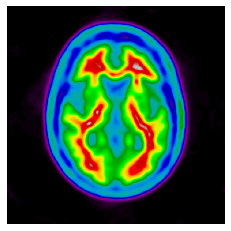

In [ ]:
plt.imshow(first_image, cmap = 'nipy_spectral')
plt.axis('off')

Let's confirm that the `_45_` number in the file name corresponds to the slice number. To do that, let's load the dicom slice datasets into a dictionary with the key as this identifier, then sort the keys & plot the slices: 

In [25]:
def read_all_dicom_slices(dicom_directory, 
                         ):
  """
  Will read in the images from a single dicom folder and return a dictionary of 
  those images with the key as the presumed slice number, and the value being the pixel array. 
  
  dicom_directory: Path or string that leads to the folder containing the slices 

  """
  dicom_image_dict = {}
    for image in glob.glob(str(Path(dicom_directory, '*'))): 
        key = image.split('/')[-1].split('_')[-3]
        dicom_image_dict[key]= pydicom.dcmread(image)
    return dicom_image_dict

In [26]:
first_dicom_dir =  Path(DATA_PATH,'PET',patient_name,image_type_to_test, date_test, image_series_test)
first_dicom_volume = read_all_dicom_slices(first_dicom_dir)


In [27]:
def visualize_dicom_volume(dicom_volume: dict): 
    """
    Takes a dicom volume, gives them the proper titles. 
    dicom_volume,  e.g. {'1': <pixel_data>, ...}
    output is to plot an appropriate size image of the voulme that one is interested in. 
    """
    num_rows = math.ceil(len(dicom_volume.keys())/5)
    keys_sorted = [str(x) for x in sorted([int(x) for x in list(dicom_volume.keys())])]
    plt.figure(figsize = (20, 15*num_rows))
    for i, key in enumerate(keys_sorted): # iterates through the dictionary, while the enumerate function keeps track of the index with i
        plt.subplot(5*num_rows,5,i+1)    # the number of images in the grid 
        value = dicom_volume[key]
        img = value.pixel_array
        plt.imshow(img, cmap= 'gray')
        plt.axis('off')
        plt.title(key)
    plt.show()

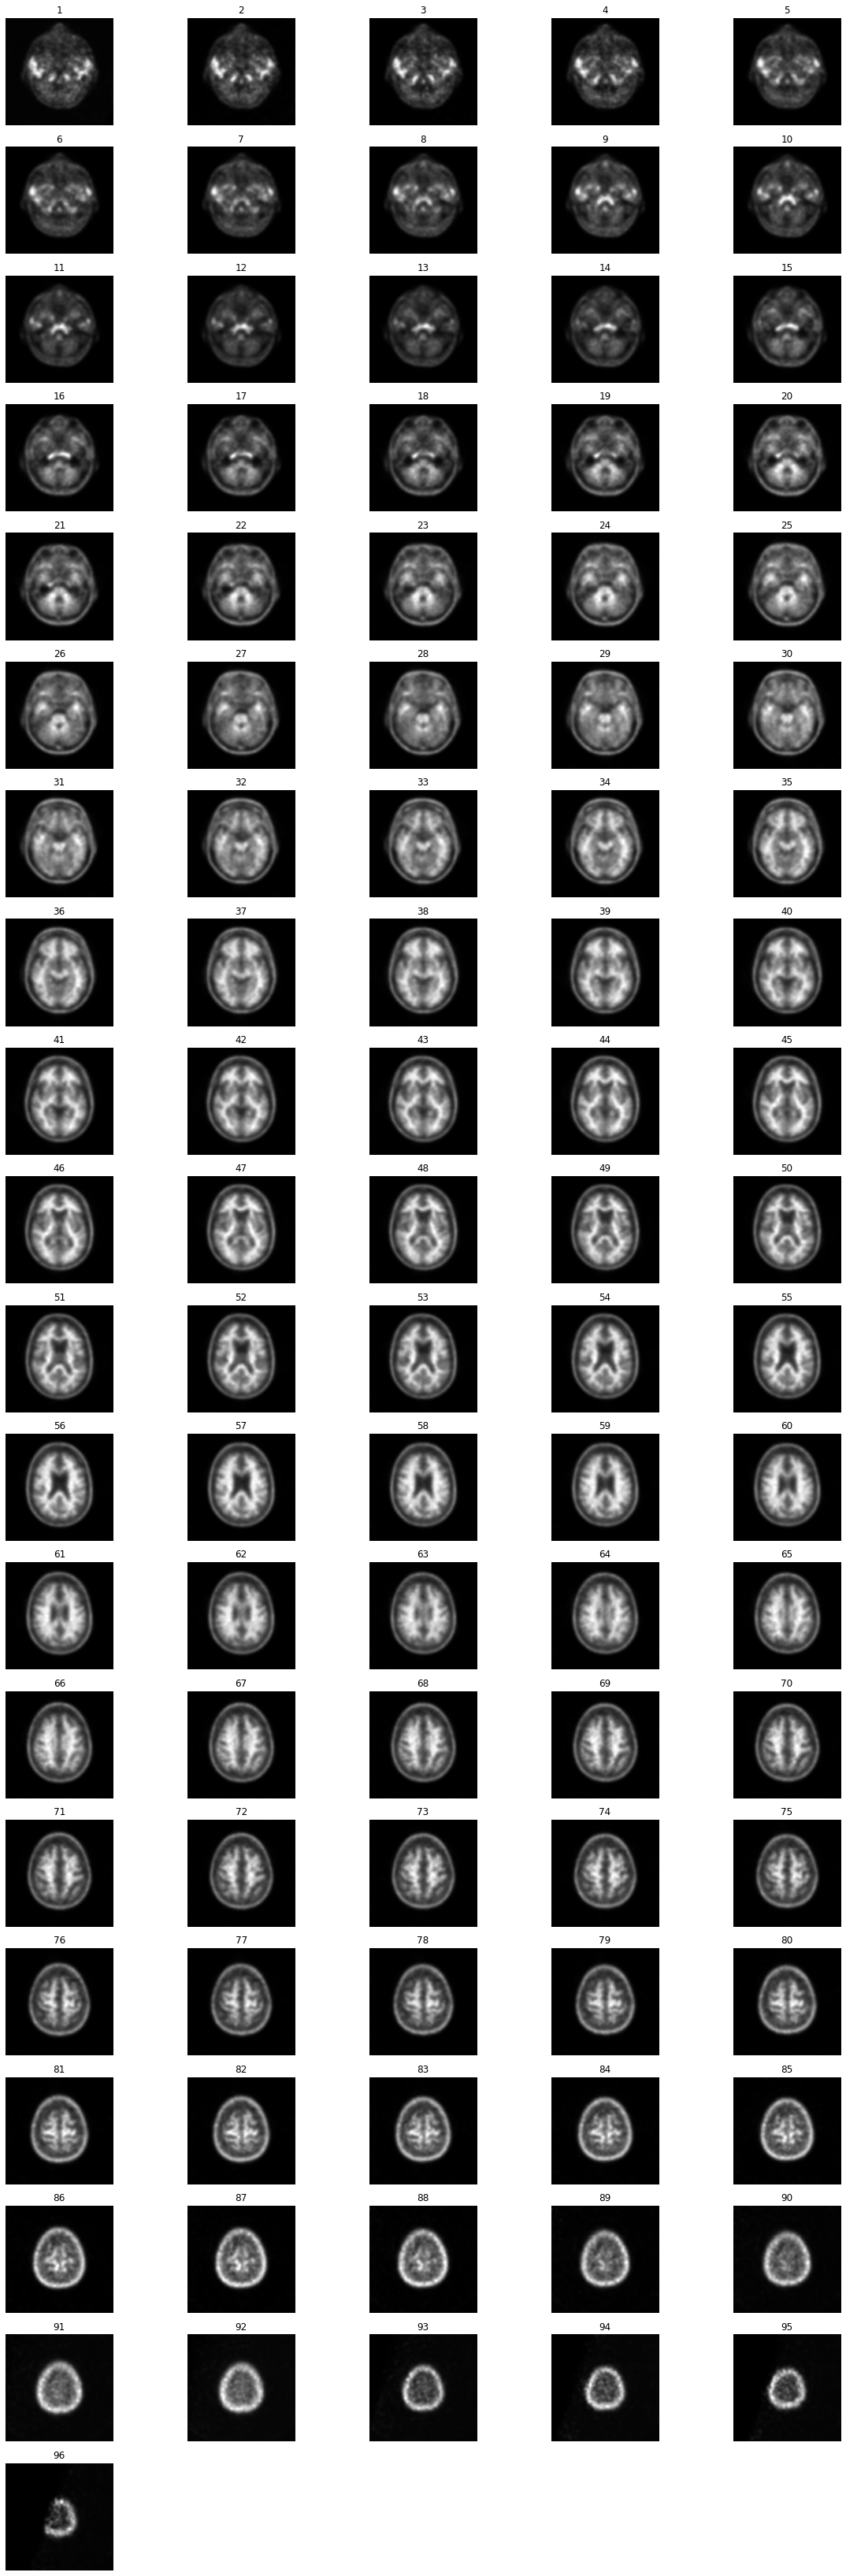

In [28]:
visualize_dicom_volume(first_dicom_volume)

They do look ordered and as though the slice number corresponds pretty well with the way that it's named. 

# 4. Creating your PET dataset

One good practice is to create a master index CSV file with the path to all the images you want to use (e.g. the middle slices) and other information you want so it is all in one place. Below, we will start to create a dataframe that we plan to write to a CSV once we have all the information cleaned up: 

To create a list of the center slices of all the uniform images we will do the following: 
1. Create a list of all the uniform images we think we have 
2. Find the middle slice of these uniform images 
3. Explore how many slices each of these volumes has to see if there are any major differences between the PET acquistions (even those that have been processed to form uniform voxels) 
4. Explore the naming of these slices to see if there are any major differences based on the patterns we noticed before 

5. Create a CSV file that has all the relevant information about the PET data that we need so that we can use it to guide reading in images for modeling

## 4.1 Create a list of all the uniform images we think we have: 

In [7]:
uniform_path_list = glob.glob(str(Path(DATA_PATH,'PET', '*', '*niform*', '*', '*')))

NameError: name 'glob' is not defined

In [30]:
uniform_path_list.sort()

In [31]:
len(uniform_path_list)

702

## 4.2 Here, we want to go through the path list of uniform voxels and find the middle "center" slice of the volume and record the path to it:

In [7]:
middle_slices = []
for path_to_uniform in tqdm(uniform_path_list): # Using the tqdm package to show a status bar based on how quickly the process is running
    num_slices = len(os.listdir(path_to_uniform))
    middle_slice = str(num_slices//2)
    if len(glob.glob(path_to_uniform+'/*_'+middle_slice+"_*")) > 0: 
        middle_slices.append(glob.glob(path_to_uniform+'/*_'+middle_slice+"_*"))
    else: pass
    # print(path_to_uniform)

NameError: name 'uniform_path_list' is not defined

In [33]:
len(middle_slices)

587

Start your dataframe by creating a "middle_slice_df" which has the first column as the path to the middle slices (the core of our dataset) 

In [34]:
middle_slice_df = pd.DataFrame({'path_middle_slices': [x[0] for x in middle_slices]})

### 3.3 Explore how many slices each of these volumes has to see if there are any major differences between the PET acquistions (even those that have been processed to form uniform voxels)

In [37]:
middle_slice_df['slice_num'] = [x.split('_')[-3] for x in middle_slice_df.path_middle_slices]
middle_slice_df.slice_num.value_counts().head()

48     403
768     22
39      18
47      14
45      13
40      11
43      11
41      10
42       9
37       8
44       8
38       8
34       5
36       5
35       3
31       3
32       3
26       3
46       3
24       2
25       2
49       1
589      1
21       1
23       1
16       1
326      1
626      1
183      1
2        1
19       1
15       1
270      1
30       1
574      1
18       1
570      1
27       1
5        1
11       1
33       1
704      1
665      1
10       1
Name: SLICE_NUM, dtype: int64

## 4.3 Explore the naming; are there averaged and dynamic images in here? 

Building the dataframe with relevant information: 

In [36]:
middle_slice_df['avg_or_dyn'] = ['Avg' if 'avg' in x.lower() else 'Dyn' for x in middle_slice_df.path_middle_slices]
middle_slice_df.avg_or_dyn.value_counts()

Avg    556
Dyn     31
Name: AVG_OR_DYN, dtype: int64

In the exercise above, this list shows that there are 403 volumes with 48 slices, and 22 volumes with 768 slices. This is probably the difference between dynamic and average PET acquisition. 

In [ ]:
test_dicom_avg = pydicom.dcmread(middle_slice_df.loc[0,'path_middle_slices'])
first_dyn_index = list(middle_slice_df.loc[middle_slice_df.avg_or_dyn=='Dyn'].index)[0]
test_dicom_dyn = pydicom.dcmread(middle_slice_df.loc[first_dyn_index, 'path_middle_slices'])

Making sure that the average images are what we actually want by visualizing them: 

Text(0.5, 1.0, 'Middle slice of Average image')

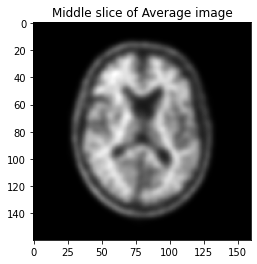

In [39]:
plt.imshow(test_dicom_avg.pixel_array, cmap = 'gray')
plt.axis('off')
plt.title('Middle slice of Average image')


In [8]:
plt.imshow(test_dicom_dyn.pixel_array, cmap = 'gray')
plt.axis('off')
plt.title('Middle slice of dynamic image')

NameError: name 'plt' is not defined

It looks like the dynamic images aren't really the right kind of images that we want in order to predict whether someone has AD or not. Let's get rid of those: 

In [41]:
middle_slice_df = middle_slice_df.loc[middle_slice_df.avg_or_dyn == 'Avg'].reset_index(drop = True)
middle_slice_df.shape

(556, 3)

In [42]:
middle_slice_df.head()

FILEPATH_MIDDLE_SLICES AVG_OR_DYN SLICE_NUM
0  /content/drive/MyDrive/Data_Shortcut/Module1_A...        Avg        48
1  /content/drive/MyDrive/Data_Shortcut/Module1_A...        Avg        48
2  /content/drive/MyDrive/Data_Shortcut/Module1_A...        Avg        48
3  /content/drive/MyDrive/Data_Shortcut/Module1_A...        Avg        48
4  /content/drive/MyDrive/Data_Shortcut/Module1_A...        Avg        48

Write the middle slice df to a csv file to make sure that it's saved: 

In [43]:
os.makedirs(Path(DATA_PATH.parent, 'csvs'), exist_ok = True)

In [44]:
middle_slice_df.to_csv(Path(DATA_PATH.parent, 'csvs', 'ADNI_PET_MiddleSlices_UniformResolution_Averages.csv'))

## 4.5 Create a CSV file that has all the relevant information about the PET data that we need so that we can use it to guide reading in images for modeling

We already created the `middle_slice_df` with some relevant information; let's add in additional clinical information. Add in some of the clinical characteristics/outcomes to be able to relate the clinical outcomes (e.g. "Group" (our outcome)) to the slices themselves so we know what to predict: 

In [ ]:
clinical_data_df.head()

Image Data ID     Subject Group Sex  ...       Type   Acq Date Format Downloaded
0       I877234  941_S_5193   SMC   F  ...  Processed  7/14/2017    DCM  8/31/2021
1       I378348  941_S_5193   SMC   F  ...  Processed  6/12/2013    DCM  9/16/2021
2       I877232  941_S_5193   SMC   F  ...  Processed  7/14/2017    DCM  9/01/2021
3       I378351  941_S_5193   SMC   F  ...  Processed  6/12/2013    DCM  9/16/2021
4       I877235  941_S_5193   SMC   F  ...  Processed  7/14/2017    DCM  9/01/2021

[5 rows x 12 columns]

In [ ]:
middle_slice_df.head()

FILEPATH_MIDDLE_SLICES AVG_OR_DYN SLICE_NUM
0  /content/drive/MyDrive/Data_Shortcut/Module1_A...        Avg        48
1  /content/drive/MyDrive/Data_Shortcut/Module1_A...        Avg        48
2  /content/drive/MyDrive/Data_Shortcut/Module1_A...        Avg        48
3  /content/drive/MyDrive/Data_Shortcut/Module1_A...        Avg        48
4  /content/drive/MyDrive/Data_Shortcut/Module1_A...        Avg        48

In [ ]:
middle_slice_df['Subject'] = [x.split('/')[7] for x in middle_slice_df.path_middle_slices]
middle_slice_df.Subject.value_counts().head()

016_S_5251    2
027_S_0120    2
127_S_5200    2
131_S_5138    2
027_S_5169    2
             ..
027_S_1045    1
072_S_4613    1
068_S_4859    1
941_S_5124    1
002_S_5018    1
Name: PTID, Length: 539, dtype: int64

Going to check and see if there are duplicated patients in this PET data: 

In [ ]:
middle_slice_df.Subject.duplicated().value_counts()

False    539
True      17
Name: PTID, dtype: int64

Let's select one  middle slice per patient: 

In [ ]:
middle_slice_df = middle_slice_df.loc[~middle_slice_df.Subject.duplicated()].reset_index(drop = True) 

In [ ]:
middle_slice_df.shape

(539, 4)

In [ ]:
clinical_data_df.Subject.duplicated().value_counts()

True     3847
False     914
Name: Subject, dtype: int64

In [ ]:
clinical_data_df = clinical_data_df.loc[~clinical_data_df.Subject.duplicated()]

In [ ]:
consolidated_clinical_data_df = middle_slice_df.merge(clinical_data_df, on = 'Subject', how = 'left')

In [ ]:
consolidated_clinical_data_df.shape

(539, 16)

In [ ]:
consolidated_clinical_data_df.head()

FILEPATH_MIDDLE_SLICES  ... Downloaded
0  /content/drive/MyDrive/Data_Shortcut/Module1_A...  ...  9/16/2021
1  /content/drive/MyDrive/Data_Shortcut/Module1_A...  ...  9/03/2021
2  /content/drive/MyDrive/Data_Shortcut/Module1_A...  ...  9/01/2021
3  /content/drive/MyDrive/Data_Shortcut/Module1_A...  ...  9/16/2021
4  /content/drive/MyDrive/Data_Shortcut/Module1_A...  ...  9/16/2021

[5 rows x 16 columns]

Our outcome will be the diagnosis which is indicated by the "Group" column. Let's see what the counts of diagnosis are: 

In [ ]:
consolidated_clinical_data_df.Group.value_counts()

CN      141
EMCI    115
LMCI     99
AD       90
SMC      68
MCI      26
Name: Group, dtype: int64

In [ ]:
consolidated_clinical_data_df.to_csv(Path('/content/drive/MyDrive/Data_Shortcut/Module1_ADNI/CSVS', 'ADNI_PET_MiddleSlices_ClinicalData.csv'))

In [ ]:
consolidated_clinical_data_df.Group.value_counts()

CN      141
EMCI    115
LMCI     99
AD       90
SMC      68
MCI      26
Name: Group, dtype: int64

To check, I'm going to look at the PET images from a few cognitively normal patients: 

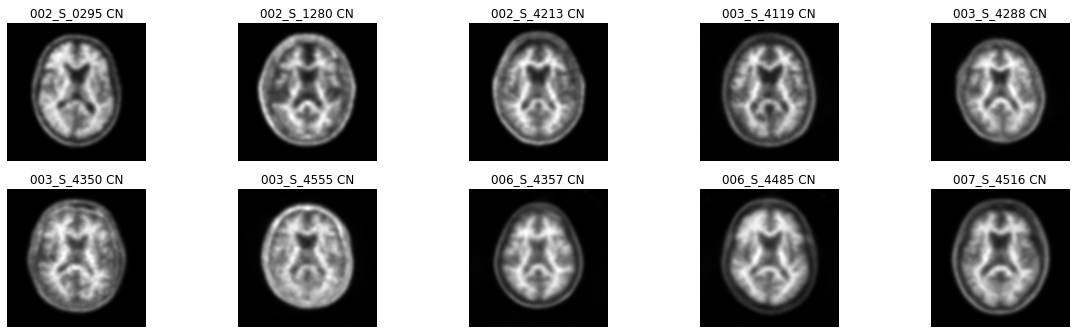

In [ ]:
num_patients_visualize = 10
num_rows = math.ceil(num_patients_visualize/5)
plt.figure(figsize = (20, 15*num_rows))
CN_df = consolidated_clinical_data_df.loc[consolidated_clinical_data_df.Group == 'CN'].copy().reset_index(drop = True)
for i, row in CN_df[:num_patients_visualize].iterrows(): # iterates through the dictionary, while the enumerate function keeps track of the index with i
    plt.subplot(5*num_rows,5,i+1)    # the number of images in the grid 
    dicom_ds = pydicom.dcmread(row['path_middle_slices'])
    img = dicom_ds.pixel_array
    plt.imshow(img, cmap= 'gray')
    plt.axis('off')
    plt.title(row['Subject']+' '+row['Group'])
plt.show()


Here I'm looking at a few random AD patients: 

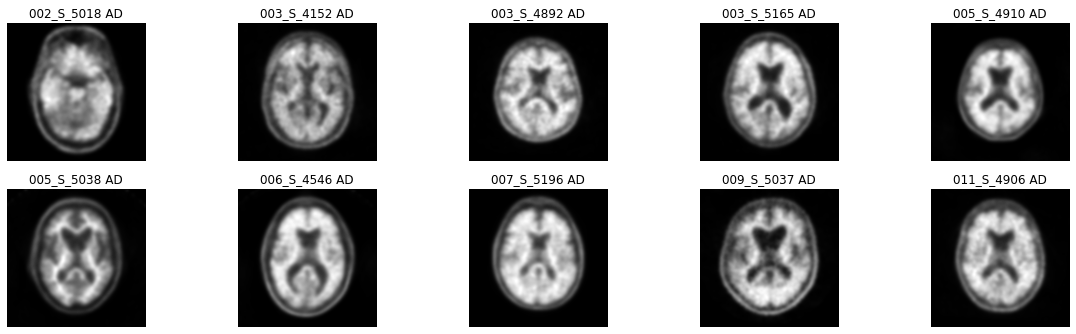

In [ ]:
num_patients_visualize = 10
num_rows = math.ceil(num_patients_visualize/5)
plt.figure(figsize = (20, 15*num_rows))
AD_df = consolidated_clinical_data_df.loc[consolidated_clinical_data_df.Group == 'AD'].copy().reset_index(drop = True)
for i, row in AD_df[:num_patients_visualize].iterrows(): # iterates through the dictionary, while the enumerate function keeps track of the index with i
    plt.subplot(5*num_rows,5,i+1)    # the number of images in the grid 
    dicom_ds = pydicom.dcmread(row['path_middle_slices'])
    img = dicom_ds.pixel_array
    plt.imshow(img, cmap= 'gray')
    plt.axis('off')
    plt.title(row['Subject']+' '+row['Group'])
plt.show()


I see a general "hotter" trend in the AD patients. The next step will be to let the algorithm decide which "hot" features are useful for predicting AD from CN patients. 